**preliminary questions/tips you can think about for each part**
1. Data Sampling and Collection
    1. How were the data collected?
    1. Was there any potential bias introduced in the sampling process?
2. Data Cleaning
    1. What type of data are you currently exploring?
    1. What is the granularity of the data?
    1. What does the distribution of the data look like? Are there any outliers? Are there any missing or invalid entries?
3. Exploratory Data Analysis
    1. Is there any correlation between the variables you are interested in exploring?
    1. How would you cleanly and accurately visualize the relationship among variables?
4. Data Modeling and Inferences
    1. Please note that the following datasets have a data modeling requirement, i.e. you need to utilize at least 1 machine learning model we teach in this class in your project: Topic 1 - Dataset A, Topic 1 - Dataset C, Topic 2 - Dataset A, Topic 3 - Dataset A, Topic 3 - Dataset B. For datasets not mentioned above, you are welcome to continue building machine learning model(s). Otherwise, we will be placing more emphasis on the inference part instead.
    1. Here are a few components your notebook must address if your focus is on modeling:
        1. What type of machine learning problem are you investigating?
        1. What model do you plan on using and why?
        1. Does your model require hyperparameter tuning? If so, how do you approach it?
        1. How do you engineer the features for your model? What are the rationales behind selecting these features?
        1. How do you perform cross validation on your model?
        1. What loss metrics are you using to evaluate your model?
        1. From a bias-variance tradeoff standpoint, how do you assess the performance of your model? How do you check if it is overfitting?
        1. How would you improve your model based on the outcome?
    1. If you are choosing to pursue your research question from an inference angle
        1. Your notebook must demonstrate sufficient analysis and visualization to support your conclusion.
        1. You must have a clearly constructed hypothesis test (including a clearly defined test statistic, significance level, and justification of chosen procedure)
        1. We will not restrict you to the type of statistical test you conduct as there are many different statistical techniques that may apply to your case. However, we also ask that you provide detailed justification for the techniques you choose and how it allows you make those inferences.

# Packages

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from time import time
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 1. Data Sampling and Collection

1. How were the data collected?
1. Was there any potential bias introduced in the sampling process?

In [2]:
year_of_interest = 2019
try:
    gasType = pd.read_csv("Data/us_greenhouse_gas_emission_direct_emitter_gas_type.csv")
    facility =  pd.read_csv("Data/us_greenhouse_gas_emissions_direct_emitter_facilities.csv")
    code6Digit = pd.read_excel("Data/6-digit_2022_Codes.xlsx")
    code2To6Digit = pd.read_excel("Data/2-6 digit_2022_Codes.xlsx")
    daily_aqi_2015_2019 = {2015: pd.read_csv("Data/daily_aqi_by_county_2015.csv"),
                     2016: pd.read_csv("Data/daily_aqi_by_county_2016.csv"),
                     2017: pd.read_csv("Data/daily_aqi_by_county_2017.csv"),
                     2018: pd.read_csv("Data/daily_aqi_by_county_2018.csv"),
                     2019: pd.read_csv("Data/daily_aqi_by_county_2019.csv"),
                    }
    daily_aqi_2019 = daily_aqi_2015_2019[year_of_interest]
except FileNotFoundError:
    print("WRONG FILE.")

## 1.1. `gasType` Explore

In [3]:
display(gasType.head())
display(gasType.shape)

,V_GHG_EMITTER_GAS.ADDRESS1,V_GHG_EMITTER_GAS.ADDRESS2,V_GHG_EMITTER_GAS.CITY,V_GHG_EMITTER_GAS.CO2E_EMISSION,V_GHG_EMITTER_GAS.COUNTY,V_GHG_EMITTER_GAS.FACILITY_ID,V_GHG_EMITTER_GAS.GAS_CODE,V_GHG_EMITTER_GAS.GAS_NAME,V_GHG_EMITTER_GAS.LATITUDE,V_GHG_EMITTER_GAS.LONGITUDE,V_GHG_EMITTER_GAS.STATE,V_GHG_EMITTER_GAS.STATE_NAME,V_GHG_EMITTER_GAS.YEAR,V_GHG_EMITTER_GAS.ZIP,V_GHG_EMITTER_GAS.FACILITY_NAME,V_GHG_EMITTER_GAS.COUNTY_FIPS
0,1919 S. BROADWAY,NaN,GREEN BAY,58024.000,BROWN COUNTY,1000589,BIOCO2,Biogenic CO2,44.492500,-88.032300,WI,WISCONSIN,2017,54304,GEORGIA-PACIFIC CONSUMER OPERATIONS LLC,55009.0
1,850 12TH AVE,NaN,NEW YORK,134.500,New York,1000766,CH4,Methane,40.771100,-73.991100,NY,NEW YORK,2018,10019,59th Street,36061.0
2,3379 HWY 482,NaN,Noble,6.854,SABINE,1009343,N2O,Nitrous Oxide,31.621528,-93.724774,LA,LOUISIANA,2012,71462,Baker Road Treater,22085.0
3,1012 BEAUCHAMP ST,NaN,GREENVILLE,53562.000,WASHINGTON COUNTY,1003557,CH4,Methane,33.392476,-91.017584,MS,MISSISSIPPI,2017,38701,TEXAS GAS TRANSMISSION - GREENVILLE STATION,28151.0
4,487 CORN CREEK ROAD,NaN,BEDFORD,7635064.700,Trimble,1006542,CO2,Carbon Dioxide,38.584700,-85.411700,KY,KENTUCKY,2018,40006,Trimble County,21223.0


(219928, 16)

The shape of `gasType` is (219928, 16). The grauality of the dataset is consistent. Each row represents one emission record. **(not unique on [facility_id, year])** Since our main focus is on CO2 emission, posssible useful features include:
- **id/name:**
    - `V_GHG_EMITTER_GAS.FACILITY_ID` (unique key to join other tables)
    - `V_GHG_EMITTER_GAS.FACILITY_NAME` (name)
- **location:** 
    - `V_GHG_EMITTER_GAS.STATE` (state)
    - `V_GHG_EMITTER_GAS.COUNTY` (county)
    - `V_GHG_EMITTER_GAS.CITY` (city)
    - `V_GHG_EMITTER_GAS.ZIP` (zip code)
    - `V_GHG_EMITTER_GAS.FIPS` (county identifier)
- **target feature:**
    - `V_GHG_EMITTER_GAS.YEAR` (emission year, not foundation year)
    - `V_GHG_EMITTER_GAS.CO2E_EMISSION` (CO2 emission, not included in facility)

In [4]:
# `V_GHG_EMITTER_GAS.FACILITY_ID` presents emission year, not facility foudation year
gasType[gasType["V_GHG_EMITTER_GAS.FACILITY_ID"] == 1000001]['V_GHG_EMITTER_GAS.YEAR'].unique()

array([2018, 2010, 2014, 2015, 2017, 2012, 2016, 2013, 2019, 2011])

## 1.2. `facility` Explore

In [5]:
display(facility.head())
display(facility.shape)

,V_GHG_EMITTER_FACILITIES.ADDRESS1,V_GHG_EMITTER_FACILITIES.ADDRESS2,V_GHG_EMITTER_FACILITIES.CEMS_USED,V_GHG_EMITTER_FACILITIES.CITY,V_GHG_EMITTER_FACILITIES.COUNTY,V_GHG_EMITTER_FACILITIES.COUNTY_FIPS,V_GHG_EMITTER_FACILITIES.FACILITY_ID,V_GHG_EMITTER_FACILITIES.LATITUDE,V_GHG_EMITTER_FACILITIES.LONGITUDE,V_GHG_EMITTER_FACILITIES.PRIMARY_NAICS_CODE,...,V_GHG_EMITTER_FACILITIES.STATE_NAME,V_GHG_EMITTER_FACILITIES.YEAR,V_GHG_EMITTER_FACILITIES.ZIP,V_GHG_EMITTER_FACILITIES.FACILITY_NAME,V_GHG_EMITTER_FACILITIES.SECONDARY_NAICS_CODE,V_GHG_EMITTER_FACILITIES.ADDITIONAL_NAICS_CODES,V_GHG_EMITTER_FACILITIES.COGENERATION_UNIT_EMISS_IND,V_GHG_EMITTER_FACILITIES.EPA_VERIFIED,V_GHG_EMITTER_FACILITIES.PARENT_COMPANY,V_GHG_EMITTER_FACILITIES.PLANT_CODE_INDICATOR
0,301 Commerce Dr. Suite 3701,NaN,NaN,Fort Worth,NaN,NaN,1008536.0,35.533760,-97.529760,211111.0,...,TEXAS,2012.0,76102.0,TEP Barnett USA LLC 415 - Strawn Basin,NaN,NaN,N,NaN,CHESAPEAKE ENERGY CORP (100%),NaN
1,449 Shell E&P Court,NaN,NaN,Gibson,TERREBONNE,22109.0,1005071.0,29.628790,-90.917680,211112.0,...,LOUISIANA,2011.0,70358.0,North Terrebonne Gas Plant,NaN,NaN,N,NaN,ENTERPRISE GAS PROCESSING LLC (64.19%); DCP M...,NaN
2,5494 MALONE ROAD,NaN,NaN,MEMPHIS,SHELBY COUNTY,47157.0,1002466.0,34.999213,-89.906724,562212.0,...,TENNESSEE,2017.0,38116.0,SOUTH SHELBY LANDFILL,NaN,NaN,N,NaN,REPUBLIC SERVICES INC (100%),N
3,1601 WEEDON ISLAND DRIVE,NaN,NaN,SAINT PETERSBURG,Pinellas,12103.0,1001489.0,27.861300,-82.601200,221112.0,...,FLORIDA,2015.0,33702.0,P L Bartow Power Plant,NaN,NaN,N,NaN,DUKE ENERGY CORP (100%),Y
4,NaN,NaN,NaN,Rhome,WISE COUNTY,48497.0,1007509.0,33.052600,-97.411400,211112.0,...,TEXAS,2015.0,76078.0,Ross Compressor Station,NaN,NaN,N,NaN,SWG PIPELINE LLC (100%),Y


(77106, 21)

The shape of `facility` is (77106, 21). The grauality of the dataset is consistent. Each row represents one facility each year. **(unique on [facility_id, year])** Posssible useful features include:
- **id/name:**
    - `V_GHG_EMITTER_FACILITIES.FACILITY_ID` (unique key to join other tables)
    - `V_GHG_EMITTER_FACILITIES.FACILITY_NAME` (name)
    - `V_GHG_EMITTER_FACILITIES.PARENT_COMPANY` (parent company, not included in gasType)
- **location:** 
    - `V_GHG_EMITTER_FACILITIES.STATE` (state)
    - `V_GHG_EMITTER_FACILITIES.COUNTY` (county)
    - `V_GHG_EMITTER_FACILITIES.CITY` (city)
    - `V_GHG_EMITTER_FACILITIES.ZIP` (zip code)
- **target feature:**
    - `V_GHG_EMITTER_FACILITIES.YEAR` (emission year, not foundation year)
    - `V_GHG_EMITTER_FACILITIES.PRIMARY_NAICS_CODE` (industry, not included in gasType)

## 1.3. `code6Digit` Explore

In [6]:
display(code6Digit.head())
display(code6Digit.shape)

,2022 NAICS Code,2022 NAICS Title
0,111110,Soybean Farming
1,111120,Oilseed (except Soybean) Farming
2,111130,Dry Pea and Bean Farming
3,111140,Wheat Farming
4,111150,Corn Farming


(1012, 2)

`code6Digit` is a lookup table, storing 6-digit code and its industry. This dataset is provided by [United States Census Bureau](https://www.census.gov/naics/?48967). Click "Reference Files" then click "Downloadable Files", and you will find **6-digit 2022 Code File [XLSX, 43KB] for 2022**.

## 1.4. `code2To6Digit` Explore

In [7]:
display(code2To6Digit.head())
display(code2To6Digit.shape)

,Seq. No.,2022 NAICS US Code,2022 NAICS US Title
0,1,11,"Agriculture, Forestry, Fishing and Hunting"
1,2,111,Crop Production
2,3,1111,Oilseed and Grain Farming
3,4,11111,Soybean Farming
4,5,111110,Soybean Farming


(2125, 3)

`code2To6Digit` is a lookup table, storing code whose length is 2 to 6 and its title. This dataset is provided by [United States Census Bureau](https://www.census.gov/naics/?48967). Click "Reference Files" then click "Downloadable Files", and you will find **2-6 digit 2022 Code File [XLSX, 43KB] for 2022**.

## 1.5. `daily_aqi_2019` Explore

In [8]:
display(daily_aqi_2019.tail(10))
display(daily_aqi_2019.shape)

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
340159,Wyoming,Weston,56,45,2019-12-22,37,Good,Ozone,56-045-0003,2
340160,Wyoming,Weston,56,45,2019-12-23,38,Good,Ozone,56-045-0003,2
340161,Wyoming,Weston,56,45,2019-12-24,37,Good,Ozone,56-045-0003,2
340162,Wyoming,Weston,56,45,2019-12-25,35,Good,Ozone,56-045-0003,2
340163,Wyoming,Weston,56,45,2019-12-26,31,Good,Ozone,56-045-0003,2
340164,Wyoming,Weston,56,45,2019-12-27,36,Good,Ozone,56-045-0003,2
340165,Wyoming,Weston,56,45,2019-12-28,37,Good,Ozone,56-045-0003,2
340166,Wyoming,Weston,56,45,2019-12-29,34,Good,Ozone,56-045-0003,2
340167,Wyoming,Weston,56,45,2019-12-30,36,Good,Ozone,56-045-0003,2
340168,Wyoming,Weston,56,45,2019-12-31,40,Good,Ozone,56-045-0003,2


(340169, 10)

`daily_aqi_2019` has a shape of (340169, 10). The grauality of the dataset is consistent. Each row represents a daily aqi report from a county.  **(unique on [State Code, County Code, Date])** Posssible useful features include:
- **id/name:**
    - `State Code` + `County Code` = `FIPS` (unique key to join other tables)
- **target feature:**
    - `AQI` (Daily AQI)

Dataset is provided by [EPA](https://aqs.epa.gov/aqsweb/airdata/download_files.html).

# 2. Data Cleaning

1. What type of data are you currently exploring?
1. What is the granularity of the data?
1. What does the distribution of the data look like? Are there any outliers? Are there any missing or invalid entries?

## 2.1. Rename Columns

In [9]:
def renameCols(df):
    for col in df.columns:
        df = df.rename({col: col.split('.')[1].lower()}, axis = 1)
    return df

In [10]:
gasType = renameCols(gasType)
facility = renameCols(facility)
display(gasType.columns)
display(facility.columns)

code6Digit = code6Digit.rename({"2022 NAICS Code": "code6Digit"
                                ,"2022 NAICS Title": "title6Digit"}, axis = 1)
code2To6Digit = code2To6Digit.rename({"2022 NAICS US   Code": "code"
                                      ,"2022 NAICS US Title": "title"}, axis = 1)
display(code6Digit.columns)
display(code2To6Digit.columns)

Index(['address1', 'address2', 'city', 'co2e_emission', 'county',
       'facility_id', 'gas_code', 'gas_name', 'latitude', 'longitude', 'state',
       'state_name', 'year', 'zip', 'facility_name', 'county_fips'],
      dtype='object')

Index(['address1', 'address2', 'cems_used', 'city', 'county', 'county_fips',
       'facility_id', 'latitude', 'longitude', 'primary_naics_code', 'state',
       'state_name', 'year', 'zip', 'facility_name', 'secondary_naics_code',
       'additional_naics_codes', 'cogeneration_unit_emiss_ind', 'epa_verified',
       'parent_company', 'plant_code_indicator'],
      dtype='object')

Index(['code6Digit', 'title6Digit'], dtype='object')

Index(['Seq. No.', 'code', 'title'], dtype='object')

## 2.2. Drop Columns

In [11]:
gasType = gasType[["facility_id", "facility_name"
                  ,"state", "county", "city", "zip"
                  ,"year", "co2e_emission", "gas_code", "county_fips"]]
facility = facility[["facility_id", "facility_name", "parent_company"
                    ,"state", "county", "city", "zip"
                    ,"year", "primary_naics_code"]]
code2To6Digit = code2To6Digit.iloc[:,[1,2]]
display(gasType.head())
display(facility.head())
display(code6Digit.head())
display(code2To6Digit.head())

,facility_id,facility_name,state,county,city,zip,year,co2e_emission,gas_code,county_fips
0,1000589,GEORGIA-PACIFIC CONSUMER OPERATIONS LLC,WI,BROWN COUNTY,GREEN BAY,54304,2017,58024.000,BIOCO2,55009.0
1,1000766,59th Street,NY,New York,NEW YORK,10019,2018,134.500,CH4,36061.0
2,1009343,Baker Road Treater,LA,SABINE,Noble,71462,2012,6.854,N2O,22085.0
3,1003557,TEXAS GAS TRANSMISSION - GREENVILLE STATION,MS,WASHINGTON COUNTY,GREENVILLE,38701,2017,53562.000,CH4,28151.0
4,1006542,Trimble County,KY,Trimble,BEDFORD,40006,2018,7635064.700,CO2,21223.0


,facility_id,facility_name,parent_company,state,county,city,zip,year,primary_naics_code
0,1008536.0,TEP Barnett USA LLC 415 - Strawn Basin,CHESAPEAKE ENERGY CORP (100%),TX,NaN,Fort Worth,76102.0,2012.0,211111.0
1,1005071.0,North Terrebonne Gas Plant,ENTERPRISE GAS PROCESSING LLC (64.19%); DCP M...,LA,TERREBONNE,Gibson,70358.0,2011.0,211112.0
2,1002466.0,SOUTH SHELBY LANDFILL,REPUBLIC SERVICES INC (100%),TN,SHELBY COUNTY,MEMPHIS,38116.0,2017.0,562212.0
3,1001489.0,P L Bartow Power Plant,DUKE ENERGY CORP (100%),FL,Pinellas,SAINT PETERSBURG,33702.0,2015.0,221112.0
4,1007509.0,Ross Compressor Station,SWG PIPELINE LLC (100%),TX,WISE COUNTY,Rhome,76078.0,2015.0,211112.0


,code6Digit,title6Digit
0,111110,Soybean Farming
1,111120,Oilseed (except Soybean) Farming
2,111130,Dry Pea and Bean Farming
3,111140,Wheat Farming
4,111150,Corn Farming


,code,title
0,11,"Agriculture, Forestry, Fishing and Hunting"
1,111,Crop Production
2,1111,Oilseed and Grain Farming
3,11111,Soybean Farming
4,111110,Soybean Farming


## 2.3. Missing Values

In [12]:
def countNA(df):
    for col in df.columns:
        print(col, sum(df[col].isna()))
    print()

countNA(gasType)
countNA(facility)
countNA(code6Digit)
countNA(code2To6Digit)

facility_id 0
facility_name 0
state 0
county 7774
city 0
zip 0
year 0
co2e_emission 0
gas_code 0
county_fips 7793

facility_id 2
facility_name 2
parent_company 1353
state 2
county 2680
city 2
zip 2
year 2
primary_naics_code 4

code6Digit 0
title6Digit 0

code 0
title 0



**Conclusion:**
- Since too many missing values exist in `county`, it's better to drop this column.
- Although `county_fips` has 7793 missing values, it will be used as the key to join with aqi table. We drop rows with missing values.
- `facility_name`, `state`, `city`, `year`, `primary_naics_code` have only 2 missing values, it's acceptable to drop the row with missing values.
- `parent_company` still has 1353 missing values.

In [13]:
gasType.drop("county", axis = 1, inplace = True)
gasType = gasType[~gasType["county_fips"].isna()]
facility.drop("county", axis = 1, inplace = True)
facility = facility[~facility["facility_name"].isna() & ~facility["state"].isna() & ~facility["city"].isna() & ~facility["year"].isna() & ~facility["primary_naics_code"].isna()]
countNA(gasType)
countNA(facility)
countNA(code6Digit)
countNA(code2To6Digit)

facility_id 0
facility_name 0
state 0
city 0
zip 0
year 0
co2e_emission 0
gas_code 0
county_fips 0

facility_id 0
facility_name 0
parent_company 1350
state 0
city 0
zip 0
year 0
primary_naics_code 0

code6Digit 0
title6Digit 0

code 0
title 0



## 2.4. Wrong Data Types

In [14]:
display(gasType.head())
display(gasType.dtypes)
print("\n\n\n")
display(facility.head())
display(facility.dtypes)
print("\n\n\n")
display(code6Digit.head())
display(code6Digit.dtypes)
print("\n\n\n")
display(code2To6Digit.head())
display(code2To6Digit.dtypes)
print("\n\n\n")
display(daily_aqi_2019.head())
display(daily_aqi_2019.dtypes)

,facility_id,facility_name,state,city,zip,year,co2e_emission,gas_code,county_fips
0,1000589,GEORGIA-PACIFIC CONSUMER OPERATIONS LLC,WI,GREEN BAY,54304,2017,58024.000,BIOCO2,55009.0
1,1000766,59th Street,NY,NEW YORK,10019,2018,134.500,CH4,36061.0
2,1009343,Baker Road Treater,LA,Noble,71462,2012,6.854,N2O,22085.0
3,1003557,TEXAS GAS TRANSMISSION - GREENVILLE STATION,MS,GREENVILLE,38701,2017,53562.000,CH4,28151.0
4,1006542,Trimble County,KY,BEDFORD,40006,2018,7635064.700,CO2,21223.0


facility_id        int64
facility_name     object
state             object
city              object
zip                int64
year               int64
co2e_emission    float64
gas_code          object
county_fips      float64
dtype: object

,facility_id,facility_name,parent_company,state,city,zip,year,primary_naics_code
0,1008536.0,TEP Barnett USA LLC 415 - Strawn Basin,CHESAPEAKE ENERGY CORP (100%),TX,Fort Worth,76102.0,2012.0,211111.0
1,1005071.0,North Terrebonne Gas Plant,ENTERPRISE GAS PROCESSING LLC (64.19%); DCP M...,LA,Gibson,70358.0,2011.0,211112.0
2,1002466.0,SOUTH SHELBY LANDFILL,REPUBLIC SERVICES INC (100%),TN,MEMPHIS,38116.0,2017.0,562212.0
3,1001489.0,P L Bartow Power Plant,DUKE ENERGY CORP (100%),FL,SAINT PETERSBURG,33702.0,2015.0,221112.0
4,1007509.0,Ross Compressor Station,SWG PIPELINE LLC (100%),TX,Rhome,76078.0,2015.0,211112.0


facility_id           float64
facility_name          object
parent_company         object
state                  object
city                   object
zip                   float64
year                  float64
primary_naics_code    float64
dtype: object

,code6Digit,title6Digit
0,111110,Soybean Farming
1,111120,Oilseed (except Soybean) Farming
2,111130,Dry Pea and Bean Farming
3,111140,Wheat Farming
4,111150,Corn Farming


code6Digit      int64
title6Digit    object
dtype: object

,code,title
0,11,"Agriculture, Forestry, Fishing and Hunting"
1,111,Crop Production
2,1111,Oilseed and Grain Farming
3,11111,Soybean Farming
4,111110,Soybean Farming


code     object
title    object
dtype: object

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2019-01-03,18,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2019-01-06,35,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2019-01-09,14,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2019-01-12,36,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2019-01-15,38,Good,PM2.5,01-003-0010,1


State Name                   object
county Name                  object
State Code                    int64
County Code                   int64
Date                         object
AQI                           int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting     int64
dtype: object

- `facility_id` should be `str`
- `zip` should be `str`
- `year` should be `int`
- `county_fips` should be `str`
- `primary_naics_code` and `"2022 NAICS Code` should be `str`
- `State Code` should be `str`
- `County Code` should be `str`

In [15]:
def toString(df, cols):
    for col in cols:
        df[col] = df[col].astype("str")
    return df

toString(gasType, ["facility_id", "zip", "county_fips"])
toString(facility, ["facility_id", "zip", "primary_naics_code"])
toString(daily_aqi_2019, ["State Code", "County Code"])
toString(code6Digit, ["code6Digit"])
facility["year"] = facility["year"].astype("int")

display(gasType.dtypes)
print()
display(facility.dtypes)
print()
display(code6Digit.dtypes)
print()
display(code2To6Digit.dtypes)
print()
display(daily_aqi_2019.dtypes)

facility_id       object
facility_name     object
state             object
city              object
zip               object
year               int64
co2e_emission    float64
gas_code          object
county_fips       object
dtype: object

facility_id           object
facility_name         object
parent_company        object
state                 object
city                  object
zip                   object
year                   int64
primary_naics_code    object
dtype: object

code6Digit     object
title6Digit    object
dtype: object

code     object
title    object
dtype: object

State Name                   object
county Name                  object
State Code                   object
County Code                  object
Date                         object
AQI                           int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting     int64
dtype: object

## 2.5 Key creation

Since FIPS code is a combination of state code and county code, we can manually create a `fips` column in `daily_aqi_2019` to join with `gasType`.

In [16]:
def get_fips(sc, cc):
    fips = ''
    if len(sc) == 1:
        fips += '0'
        fips += sc
    else:
        fips += sc
    if len(cc) == 1:
        fips += '00'
        fips += cc
    elif len(cc) == 2:
        fips += '0'
        fips += cc
    elif len(cc) == 3:
        fips += cc
    
    return fips

daily_aqi_2019["fips"] = daily_aqi_2019.apply(lambda x: get_fips(x["State Code"], x["County Code"]), axis=1)
daily_aqi_2019.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,fips
0,Alabama,Baldwin,1,3,2019-01-03,18,Good,PM2.5,01-003-0010,1,01003
1,Alabama,Baldwin,1,3,2019-01-06,35,Good,PM2.5,01-003-0010,1,01003
2,Alabama,Baldwin,1,3,2019-01-09,14,Good,PM2.5,01-003-0010,1,01003
3,Alabama,Baldwin,1,3,2019-01-12,36,Good,PM2.5,01-003-0010,1,01003
4,Alabama,Baldwin,1,3,2019-01-15,38,Good,PM2.5,01-003-0010,1,01003


## 2.6 Other Data Issues

Some data issues:
- Both upper case and lower case are used in several features. e.g. GREEN BAY and Noble
- `facility_id`, `zip`, `county_fips` are ended with ".0"
- More than one parent companies exist in `parent_company`, use the first company as its unique parent company
- In `daily_aqi_2019` each row has a time span of one day while in `gasType` each rows has a time span of one year. Take the average of AQI data of each county to represent the yearly average AQI.
- Some `county_fips` in `gasType` has a length of 4. Pad a zero to the front.

In [17]:
def toUpperCase(df):
    for col in df.columns:
        if col in ("facility_id", "zip", "year", "co2e_emission", "primary_naics_code"):
            continue
        df[col] = df[col].str.upper()
    return

toUpperCase(gasType)
toUpperCase(facility)
display(gasType.head())
display(facility.head())

,facility_id,facility_name,state,city,zip,year,co2e_emission,gas_code,county_fips
0,1000589,GEORGIA-PACIFIC CONSUMER OPERATIONS LLC,WI,GREEN BAY,54304,2017,58024.000,BIOCO2,55009.0
1,1000766,59TH STREET,NY,NEW YORK,10019,2018,134.500,CH4,36061.0
2,1009343,BAKER ROAD TREATER,LA,NOBLE,71462,2012,6.854,N2O,22085.0
3,1003557,TEXAS GAS TRANSMISSION - GREENVILLE STATION,MS,GREENVILLE,38701,2017,53562.000,CH4,28151.0
4,1006542,TRIMBLE COUNTY,KY,BEDFORD,40006,2018,7635064.700,CO2,21223.0


,facility_id,facility_name,parent_company,state,city,zip,year,primary_naics_code
0,1008536.0,TEP BARNETT USA LLC 415 - STRAWN BASIN,CHESAPEAKE ENERGY CORP (100%),TX,FORT WORTH,76102.0,2012,211111.0
1,1005071.0,NORTH TERREBONNE GAS PLANT,ENTERPRISE GAS PROCESSING LLC (64.19%); DCP M...,LA,GIBSON,70358.0,2011,211112.0
2,1002466.0,SOUTH SHELBY LANDFILL,REPUBLIC SERVICES INC (100%),TN,MEMPHIS,38116.0,2017,562212.0
3,1001489.0,P L BARTOW POWER PLANT,DUKE ENERGY CORP (100%),FL,SAINT PETERSBURG,33702.0,2015,221112.0
4,1007509.0,ROSS COMPRESSOR STATION,SWG PIPELINE LLC (100%),TX,RHOME,76078.0,2015,211112.0


In [18]:
def stripZero(df, cols):
    for col in cols:
        df[col] = df[col].astype("str").str[:-2]
    return df

def pad_fips(fips):
    if len(fips) == 5:
        return fips
    else:
        return '0' + fips
    

stripZero(facility, ["facility_id", "zip", "primary_naics_code"])
stripZero(gasType, ["county_fips"])

gasType["county_fips"] = gasType.apply(lambda x: pad_fips(x["county_fips"]), axis=1)

display(gasType.head())
display(facility.head())

,facility_id,facility_name,state,city,zip,year,co2e_emission,gas_code,county_fips
0,1000589,GEORGIA-PACIFIC CONSUMER OPERATIONS LLC,WI,GREEN BAY,54304,2017,58024.000,BIOCO2,55009
1,1000766,59TH STREET,NY,NEW YORK,10019,2018,134.500,CH4,36061
2,1009343,BAKER ROAD TREATER,LA,NOBLE,71462,2012,6.854,N2O,22085
3,1003557,TEXAS GAS TRANSMISSION - GREENVILLE STATION,MS,GREENVILLE,38701,2017,53562.000,CH4,28151
4,1006542,TRIMBLE COUNTY,KY,BEDFORD,40006,2018,7635064.700,CO2,21223


,facility_id,facility_name,parent_company,state,city,zip,year,primary_naics_code
0,1008536,TEP BARNETT USA LLC 415 - STRAWN BASIN,CHESAPEAKE ENERGY CORP (100%),TX,FORT WORTH,76102,2012,211111
1,1005071,NORTH TERREBONNE GAS PLANT,ENTERPRISE GAS PROCESSING LLC (64.19%); DCP M...,LA,GIBSON,70358,2011,211112
2,1002466,SOUTH SHELBY LANDFILL,REPUBLIC SERVICES INC (100%),TN,MEMPHIS,38116,2017,562212
3,1001489,P L BARTOW POWER PLANT,DUKE ENERGY CORP (100%),FL,SAINT PETERSBURG,33702,2015,221112
4,1007509,ROSS COMPRESSOR STATION,SWG PIPELINE LLC (100%),TX,RHOME,76078,2015,211112


In [19]:
# Use the first company as its unique parent company
facility["parent_company"] = facility["parent_company"].str.split('(').str[0].str.strip()
facility["parent_company"].head()

0            CHESAPEAKE ENERGY CORP
1    ENTERPRISE GAS PROCESSING  LLC
2             REPUBLIC SERVICES INC
3                  DUKE ENERGY CORP
4                 SWG PIPELINE  LLC
Name: parent_company, dtype: object

In [20]:
# Take AQI data yearly average by county.
daily_aqi_2019 = daily_aqi_2019.groupby("fips")["AQI"].agg('median')
daily_aqi_2019

fips
01003    37.0
01027    30.0
01033    37.0
01049    39.0
01051    39.0
         ... 
78010    20.0
78020    15.0
78030    28.0
80002    71.0
80026    43.0
Name: AQI, Length: 1052, dtype: float64

## 2.7 Merge DataFrames

Notice:
- Each row in `gasType` represents one emission record, so it's **not unique** on key = ["facility_id", "year"].
- Each row in `facility` represents one facility's infomation each year, so it's **unique** on key = ["facility_id", "year"].
- `code6Digit` is a lookup table, storing 6-digit code and its industry.

In [21]:
gasType_facility = pd.merge(left = gasType, right = facility[["facility_id", "parent_company", "primary_naics_code", "year"]], on = ["facility_id", "year"])
df = pd.merge(left = gasType_facility, right = code6Digit, left_on = "primary_naics_code", right_on = "code6Digit")
df.head()

,facility_id,facility_name,state,city,zip,year,co2e_emission,gas_code,county_fips,parent_company,primary_naics_code,code6Digit,title6Digit
0,1000766,59TH STREET,NY,NEW YORK,10019,2018,134.500,CH4,36061,CONSOLIDATED EDISON INC,221330,221330,Steam and Air-Conditioning Supply
1,1000766,59TH STREET,NY,NEW YORK,10019,2018,260083.100,CO2,36061,CONSOLIDATED EDISON INC,221330,221330,Steam and Air-Conditioning Supply
2,1000766,59TH STREET,NY,NEW YORK,10019,2018,188.336,N2O,36061,CONSOLIDATED EDISON INC,221330,221330,Steam and Air-Conditioning Supply
3,1003084,VICINITY ENERGY TRENTON L.P.,NJ,TRENTON,8608,2018,32049.200,CO2,34021,VEOLIA ENVIRONMENT NORTH AMERICAN OPERATIONS INC,221330,221330,Steam and Air-Conditioning Supply
4,1003084,VICINITY ENERGY TRENTON L.P.,NJ,TRENTON,8608,2018,15.000,CH4,34021,VEOLIA ENVIRONMENT NORTH AMERICAN OPERATIONS INC,221330,221330,Steam and Air-Conditioning Supply


- Since AQI data is from year 2019, `gasType` should be filtered to show only data from the same year.
- `daily_aqi_2019` can be merged with `gasType` using key `fips` 

In [22]:
gasType_2019 = gasType[gasType["year"] == year_of_interest]
gasType_2019 = gasType_2019.groupby("county_fips")["co2e_emission"].agg(sum)
gasType_2019 = gasType_2019.to_frame()
gasType_2019.reset_index(inplace=True)
gasType_2019.rename(columns={"county_fips": "fips"}, inplace = True)
daily_aqi_2019 = daily_aqi_2019.to_frame()
daily_aqi_2019.reset_index(inplace=True)
display(daily_aqi_2019)
display(gasType_2019)

,fips,AQI
0,01003,37.0
1,01027,30.0
2,01033,37.0
3,01049,39.0
4,01051,39.0
...,...,...
1047,78010,20.0
1048,78020,15.0
1049,78030,28.0
1050,80002,71.0


,fips,co2e_emission
0,01001,6296708.332
1,01003,213270.250
2,01005,19863.876
3,01009,47811.420
4,01015,319696.970
...,...,...
1921,72123,2694647.430
1922,72127,1522178.728
1923,72137,1232286.748
1924,78010,528289.482


In [23]:
emission_aqi = pd.merge(left = daily_aqi_2019, right = gasType_2019, on = "fips", how = "inner")
emission_aqi

,fips,AQI,co2e_emission
0,01003,37.0,213270.250
1,01033,37.0,477356.006
2,01049,39.0,63111.100
3,01055,43.0,160700.704
4,01069,35.0,144842.750
...,...,...,...
834,72097,24.5,67465.208
835,72113,35.0,68057.000
836,72127,14.0,1522178.728
837,78010,20.0,528289.482


# 3. Exploratory Data Analysis

1. Is there any correlation between the variables you are interested in exploring?
1. How would you cleanly and accurately visualize the relationship among variables?

In [24]:
def barPlot(df, col, num):
    dfAgg = (df.groupby(col)
               .agg('sum')['co2e_emission']
               .sort_values(ascending=False)[:num])
    plt.figure(figsize=(12,10))
    plt.title('Top {} Companies with Most CO2 Emissions'.format(num),fontsize=12)
    plt.xlabel(col,fontsize=12)
    plt.ylabel("Total CO2 Emissions",fontsize=12)
    plt.bar(dfAgg.index, height = dfAgg)
    plt.xticks(dfAgg.index, rotation = 'vertical');

## 3.1. CO2 Emissions Group By Facility

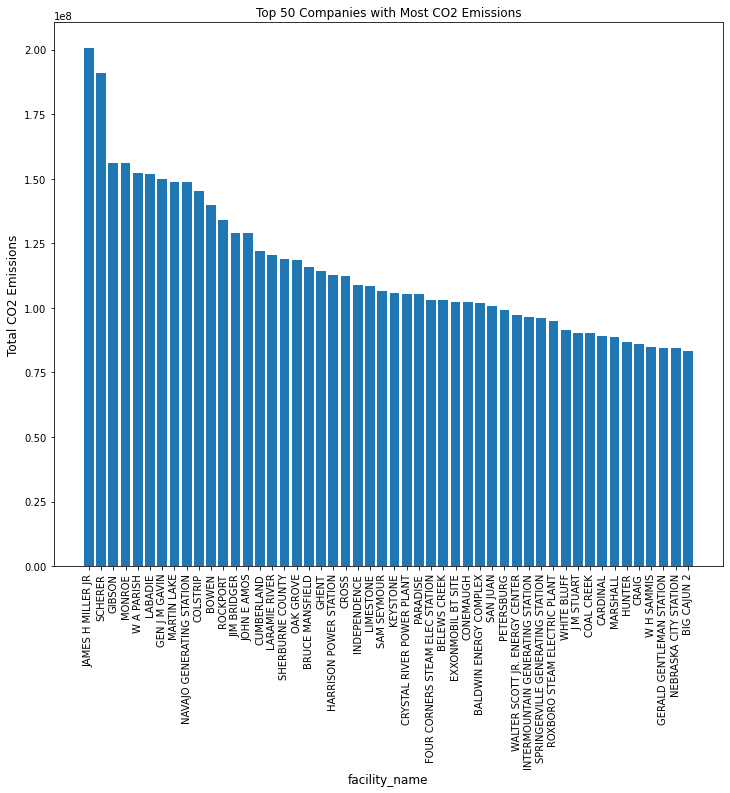

In [25]:
barPlot(df, "facility_name", 50)

## 3.2. CO2 Emissions Group by Parent Company

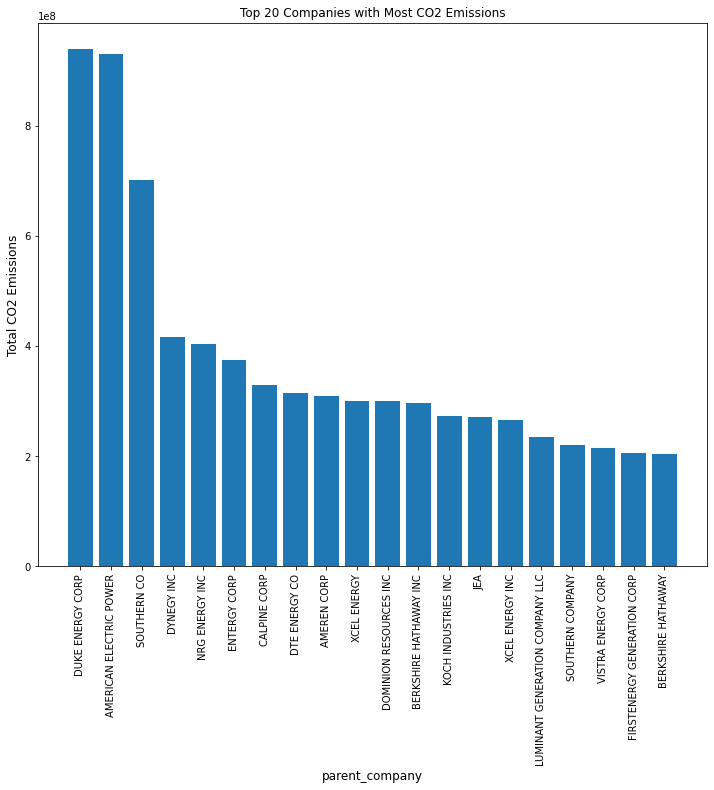

In [26]:
barPlot(df, "parent_company", 20)

## 3.3. CO2 Emissions Group by State

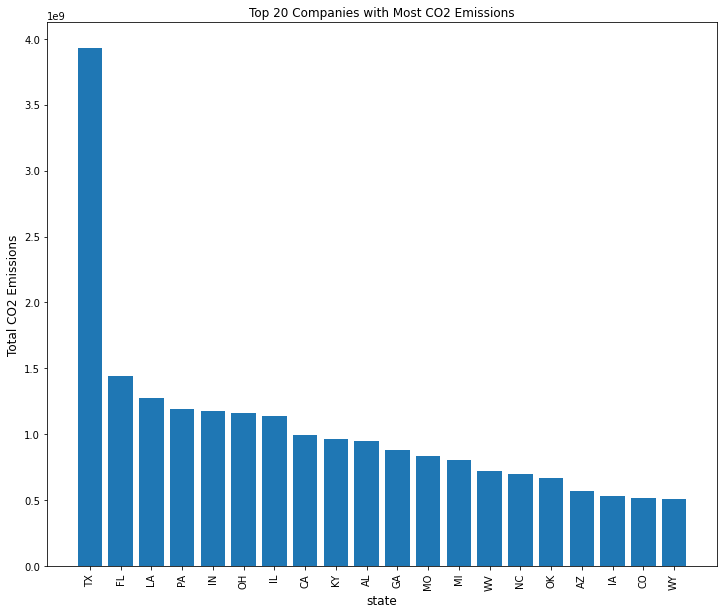

In [28]:
barPlot(df, "state", 20)

## 3.4. CO2 Emissions Group by 2022 NAICS Title

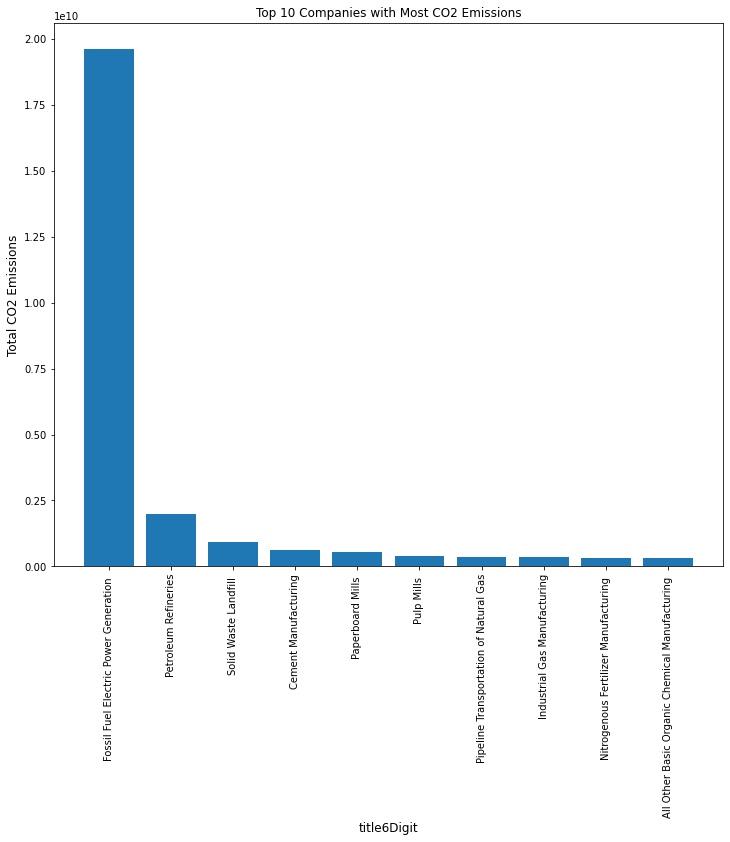

In [29]:
barPlot(df, "title6Digit", 10)

## 3.5. Relationship between AQI and emission in a county

Text(0.5, 0, 'Emission in log scale')

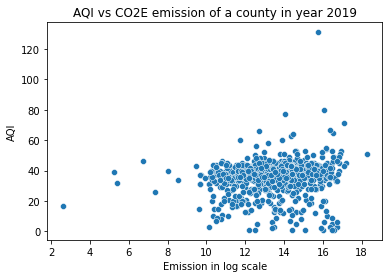

In [30]:
emission_aqi["co2e_emission"] = np.log(emission_aqi["co2e_emission"])
emission_aqi = emission_aqi[emission_aqi["AQI"] > 0]
sns.scatterplot(data=emission_aqi, x="co2e_emission", y="AQI")
plt.title("AQI vs CO2E emission of a county in year {}".format(year_of_interest))
plt.xlabel("Emission in log scale")

# 4. Data Modeling and Inferences

Purpose: Given city, zip, year, parent_company, gas_code, and code3Digit, we could predict co2e_emission without knowing which facility it is.

In [31]:
df_agg = df.drop_duplicates().sort_values(["facility_id", "year"])
display(df_agg)

,facility_id,facility_name,state,city,zip,year,co2e_emission,gas_code,county_fips,parent_company,primary_naics_code,code6Digit,title6Digit
25373,1000001,PSE FERNDALE GENERATING STATION,WA,FERNDALE,98248,2010,138.250,CH4,53073,EMPECO IV LLC AND USPF II FERNDALE HOLDINGS LLC,221112,221112,Fossil Fuel Electric Power Generation
25374,1000001,PSE FERNDALE GENERATING STATION,WA,FERNDALE,98248,2010,292987.900,CO2,53073,EMPECO IV LLC AND USPF II FERNDALE HOLDINGS LLC,221112,221112,Fossil Fuel Electric Power Generation
25375,1000001,PSE FERNDALE GENERATING STATION,WA,FERNDALE,98248,2010,164.794,N2O,53073,EMPECO IV LLC AND USPF II FERNDALE HOLDINGS LLC,221112,221112,Fossil Fuel Electric Power Generation
57185,1000001,PSE FERNDALE GENERATING STATION,WA,FERNDALE,98248,2011,17.000,CH4,53073,EMPECO IV LLC AND USPF II FERNDALE HOLDINGS LLC,221112,221112,Fossil Fuel Electric Power Generation
57186,1000001,PSE FERNDALE GENERATING STATION,WA,FERNDALE,98248,2011,20.264,N2O,53073,EMPECO IV LLC AND USPF II FERNDALE HOLDINGS LLC,221112,221112,Fossil Fuel Electric Power Generation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122915,1013774,BLACK RIVER GAS PROCESSING PLANT,NM,LOVING,88256,2019,58656.900,CO2,35015,NaN,211130,211130,Natural Gas Extraction
122916,1013774,BLACK RIVER GAS PROCESSING PLANT,NM,LOVING,88256,2019,24.734,N2O,35015,NaN,211130,211130,Natural Gas Extraction
124483,1013785,STRIKE FORCE SOUTH LLC - BASIN 160A,PA,CANONSBURG,15317,2019,17994.800,CO2,42003,NaN,211130,211130,Natural Gas Extraction
124484,1013785,STRIKE FORCE SOUTH LLC - BASIN 160A,PA,CANONSBURG,15317,2019,5755.250,CH4,42003,NaN,211130,211130,Natural Gas Extraction


## 4.1. Feature Engineering

### 4.1.1. Feature Extration-`code3Digit`

In [32]:
for length in range(2,7):
    print("count(length = {}) = {}".format(length, sum(code2To6Digit["code"].astype("str").str.len() == length)))

count(length = 2) = 17
count(length = 3) = 96
count(length = 4) = 308
count(length = 5) = 692
count(length = 6) = 1012


As we can see, encoding 3-digit code is acceptable and adds the most information.

In [33]:
# extract first three digits and encode it
df_agg["code3Digit"] = df_agg["code6Digit"].str[:3]
model_df = pd.get_dummies(df_agg["code3Digit"], prefix = "code")

### 4.1.2. Feature Creation-`parent_company`

As analyzed above, a small number of companies emit half of the CO2. Encoding `parent_company` contributes to more accurate prediction. But the unique number of `parent_company` is 6477, it's not wise to encoding all of them. Instead, we only need to encode 50 top companies and categorized the rest as *others*.

In [34]:
df_agg.parent_company.unique().shape

(6316,)

In [35]:
top50Companies = df_agg.groupby("parent_company").agg('sum')['co2e_emission'].sort_values(ascending=False)[:50].index
df_agg["parent_company"] = df_agg["parent_company"].apply(lambda x: x if x in top50Companies else "other")
model_df = pd.concat([model_df, pd.get_dummies(df_agg["parent_company"], prefix = "company")], axis = 1)
model_df.head()

,code_111,code_112,code_115,code_211,code_212,code_213,code_221,code_237,code_311,code_312,...,company_SOUTHERN CO,company_SOUTHERN COMPANY,company_TAMPA ELECTRIC CO,company_VALERO ENERGY CORP,company_VISTRA ENERGY CORP,company_WASTE MANAGEMENT INC,company_WEC ENERGY GROUP,company_XCEL ENERGY,company_XCEL ENERGY INC,company_other
25373,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
25374,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
25375,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
57185,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
57186,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### 4.1.3. Encoding `state` and `year`

In [36]:
model_df = pd.concat([model_df, pd.get_dummies(df_agg["state"], prefix = "state")], axis = 1)
model_df = pd.concat([model_df, pd.get_dummies(df_agg["year"], prefix = "year")], axis = 1)
model_df.head()

,code_111,code_112,code_115,code_211,code_212,code_213,code_221,code_237,code_311,code_312,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
25373,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
25374,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
25375,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
57185,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
57186,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### 4.1.4. Encoding `gas_code`

In [37]:
model_df = pd.concat([model_df, pd.get_dummies(df_agg["gas_code"], prefix = "gc")], axis = 1)
model_df.head()

,code_111,code_112,code_115,code_211,code_212,code_213,code_221,code_237,code_311,code_312,...,gc_CO2,gc_HFC,gc_HFE,gc_N2O,gc_NF3,gc_OTHER,gc_OTHER_FULL,gc_PFC,gc_SF6,gc_VERY_SHORT
25373,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25374,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
25375,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
57185,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57186,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### 4.1.5. Add Label

**This is final dataset feed to the machine learning model.**

In [38]:
model_df = pd.concat([model_df, df_agg["co2e_emission"]], axis = 1)
display(model_df.head())
display(model_df.shape)

,code_111,code_112,code_115,code_211,code_212,code_213,code_221,code_237,code_311,code_312,...,gc_HFC,gc_HFE,gc_N2O,gc_NF3,gc_OTHER,gc_OTHER_FULL,gc_PFC,gc_SF6,gc_VERY_SHORT,co2e_emission
25373,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,138.250
25374,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,292987.900
25375,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,164.794
57185,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,17.000
57186,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,20.264


(169287, 180)

## 4.2. Train-test Split

In [39]:
XTrain, XTest, YTrain, YTest = train_test_split(model_df.iloc[:,:-1]
                                                ,model_df.iloc[:,-1]
                                                ,test_size=0.2
                                                ,random_state=100)

## 4.3. Model Prediction and Evaluation

### 4.3.1. Base Model

In [40]:
tic = time()
YPredict = pd.Series(YTest.mean() for i in range(YTest.shape[0]))
rmseBaseModel = mean_squared_error(YTest, YPredict) ** 0.5
timeUsed = time() - tic
print("RMSE of Base Model: {:.1f}".format(rmseBaseModel))
print("Use time: {:.2f}s".format(timeUsed))

RMSE of Base Model: 857609.7
Use time: 1.64s


In [41]:
def displayModelResult(regressor, modelName):
    tic = time()
    regr = regressor.fit(XTrain, YTrain)
    rmse = mean_squared_error(YTest, regr.predict(XTest)) ** 0.5
    timeUsed = time() - tic
    print("RMSE of {}: {:.1f}".format(modelName, rmse))
    print("Use time of single model: {:.2f}s".format(timeUsed))

### 4.3.2. Linear Regression

In [42]:
displayModelResult(LinearRegression(), "linear regression")

RMSE of linear regression: 806585.6
Use time of single model: 0.58s


### 4.3.5. Decision Tree Regressor

In [43]:
displayModelResult(DecisionTreeRegressor(random_state = 10), "decision tree regressor")

RMSE of decision tree regressor: 798865.4
Use time of single model: 1.53s


In [44]:
def tuneHyperparameter(regressor, hyperparameter, grid_values):
    tic = time()
    regr_cv = GridSearchCV(regressor
                           ,scoring = "neg_mean_squared_error"
                           ,param_grid = grid_values
                           ,cv=5
                           ,verbose=0).fit(XTrain, YTrain)
    timeUsed = time() - tic
    print("Use time of cross validation: {:.2f}s".format(timeUsed))

    hyperparameters = regr_cv.cv_results_["param_"+hyperparameter].data
    scores = (-regr_cv.cv_results_['mean_test_score']) ** 0.5

    plt.xlabel(hyperparameter, fontsize=16)
    plt.ylabel('CV RMSE', fontsize=16)
    plt.scatter(hyperparameters, scores, s=30)
    plt.plot(hyperparameters, scores, linewidth=3)
    plt.grid(True, which='both')

    print('Best {}: {:.1f}'.format(hyperparameter, regr_cv.best_params_[hyperparameter]))
    return regr_cv.best_params_[hyperparameter]

Use time of cross validation: 86.93s
Best ccp_alpha: 1.0
RMSE of decision tree regressor: 798865.4
Use time of single model: 2.16s


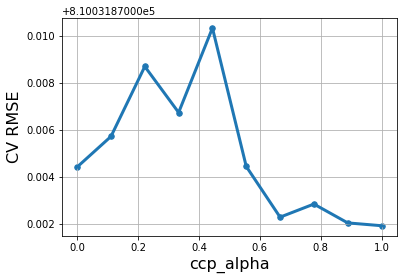

In [45]:
bestHyperParameter = tuneHyperparameter(regressor = DecisionTreeRegressor(random_state = 10)
                                       ,hyperparameter = 'ccp_alpha'
                                       ,grid_values = {'ccp_alpha': np.linspace(0, 1, 10)})
displayModelResult(DecisionTreeRegressor(random_state = 10, ccp_alpha = bestHyperParameter), "decision tree regressor")

### 4.3.6. Random Forest Regressor

In [46]:
displayModelResult(RandomForestRegressor(random_state = 10), "random forest regressor")

RMSE of random forest regressor: 787772.6
Use time of single model: 97.72s


Use time of cross validation: 138.23s
Best ccp_alpha: 0.8
RMSE of random forest regressor: 787772.6
Use time of single model: 143.54s


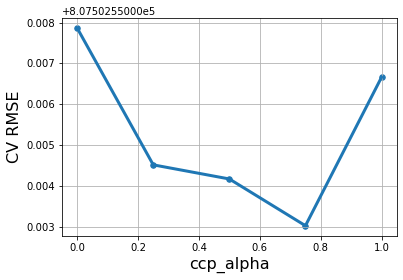

In [47]:
bestHyperParameter = tuneHyperparameter(regressor = RandomForestRegressor(random_state = 10, n_estimators = 5)
                                        ,hyperparameter = 'ccp_alpha'
                                        ,grid_values = {'ccp_alpha': np.linspace(0, 1, 5)})
displayModelResult(RandomForestRegressor(random_state = 10, ccp_alpha = bestHyperParameter), "random forest regressor")

## 4.5. Model Summary

| Model                                        | RMSE        | Time(s) | 
| ----                                         | ----------- | --------|
| Base Model                                   |  857609.7  |  2.00   |
| Linear Regression                            |  806571.4  | 0.63    |
| Decision Tree Regressor                      | 802485.0   | 2.87   |
| Random Forest Regressor                      | 788015.6   | 192.72  |